**Cloning YOLOv5 Repository**

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


**Installing Required Dependencies for YOLOv5**

In [ ]:
!pip install -r requirements.txt


**Running Object Detection with Custom YOLOv5 on an Image**

In [ ]:
!python detect.py --weights /content/best.pt --img 640 --conf 0.25 --source /content/B4120C1_img_01_jpeg.rf.ca8f9e7ce0bfb8e67e671cb40d82105b.jpg --save-txt --save-conf


detect: weights=['/content/best.pt'], source=/content/B4120C1_img_01_jpeg.rf.ca8f9e7ce0bfb8e67e671cb40d82105b.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7235730 parameters, 0 gradients
image 1/1 /content/B4120C1_img_01_jpeg.rf.ca8f9e7ce0bfb8e67e671cb40d82105b.jpg: 640x640 1 Specs, 660.8ms
Speed: 5.5ms pre-process, 660.8ms inference, 22.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp
1 labels saved to runs/detect/exp/labels


**Processing Detected Object Labels from Text File**

In [ ]:
# Path to the text file
file_path = '/content/yolov5/runs/detect/exp/labels/B4120C1_img_01_jpeg.rf.ca8f9e7ce0bfb8e67e671cb40d82105b.txt'

# Initialize an empty list to store the data
data_list = []

# Open the text file and read its contents
with open(file_path, 'r') as file:
    lines = file.readlines()

# Process each line and store the values in the list
for line in lines:
    # Split the line by spaces and convert each value to float
    values = list(map(float, line.split()))
    # Extend the data_list with the values
    data_list.extend(values)

# Print the data_list to verify
#print(data_list)


[0.0, 0.510156, 0.470313, 0.435937, 0.25, 0.848433]


**Displaying Cropped Image with Bounding Box**

187 221 465 381
Cropped Image:


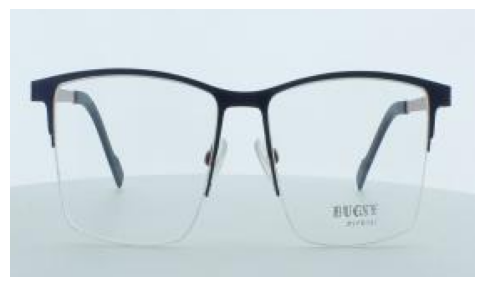

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Function to display images in Colab
# def display_image(image):
#   plt.figure(figsize=(6, 6))
#   plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#   plt.axis('off')
#   plt.show()

# Image path
image_path = '/content/B4120C1_img_01_jpeg.rf.ca8f9e7ce0bfb8e67e671cb40d82105b.jpg'

# Bounding box coordinates
class_id, x_center, y_center, box_width, box_height, confidence = data_list

# Read the image
image = cv2.imread(image_path)

# Get image dimensions
height, width, _ = image.shape

# Convert normalized coordinates to pixel values
x_center *= width
y_center *= height
box_width *= width
box_height *= height

# Calculate top-left and bottom-right coordinates
x1 = int(x_center - box_width / 2)
y1 = int(y_center - box_height / 2)
x2 = int(x_center + box_width / 2)
y2 = int(y_center + box_height / 2)

# Crop the image
#cropped_image = image[y1:y2, x1:x2]

# Display the cropped image in Colab
#print("Cropped Image:")
#display_image(cropped_image)
bbox = [x1,y1,x2,y2]

**Installing Ultralytics and Segment Anything Dependencies**

In [ ]:
!pip install ultralytics

!pip install 'git+https://github.com/facebookresearch/segment-anything.git'

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-g_f1ljef
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-g_f1ljef
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36590 sha256=1aafe5a6257a6f3123cf9c4e83d44c35a0f9ca60589cd0f56737038625474cbc
  Stored in directory: /tmp/pip-ephem-wheel-cache-yyro1qf3/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
--2024-05-16 13:05:31--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.173.166.48, 18.173.166.74, 18.173.166.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.173

**Importing Required Libraries and Checking Ultralytics Installation**

In [ ]:
import ultralytics
from ultralytics import YOLO
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from IPython.display import display, Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
ultralytics.checks()

Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/107.7 GB disk)


**Initializing SAM Model and Predictor**

In [ ]:
sam_checkpoint = "/content/yolov5/sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)

**Setting Image for SAM Predictor**

In [ ]:
image = cv2.cvtColor(cv2.imread('/content/B4120C1_img_01_jpeg.rf.ca8f9e7ce0bfb8e67e671cb40d82105b.jpg'), cv2.COLOR_BGR2RGB)
predictor.set_image(image)

**Functions for Showing Masks, Points, and Boxes**

In [ ]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

**Displaying the image with the predicted mask and bounding box.**

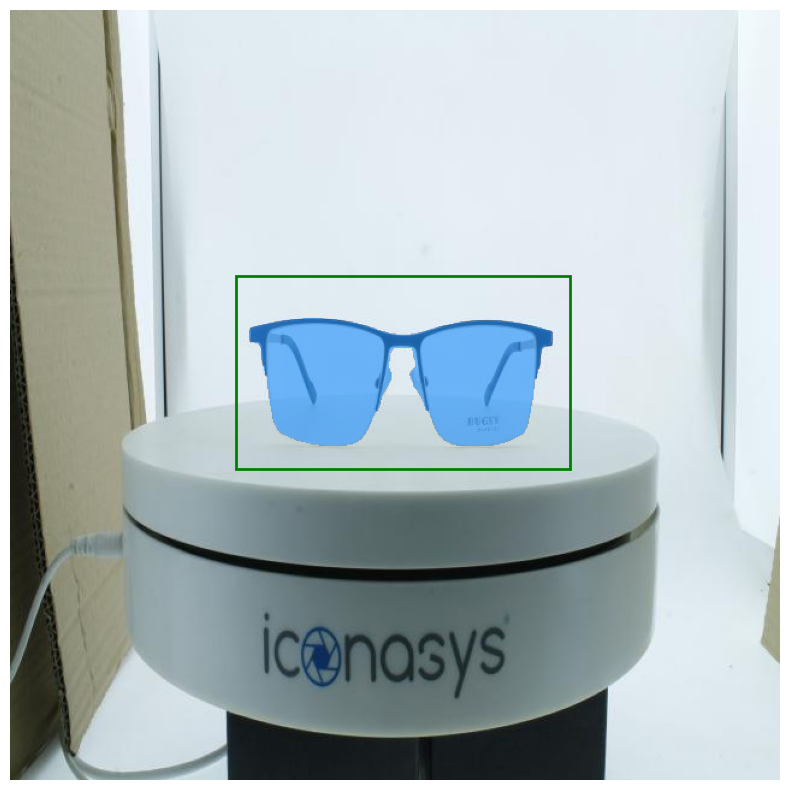

In [ ]:
input_box = np.array(bbox)

masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')
plt.show()

**Displaying the segmented object.**

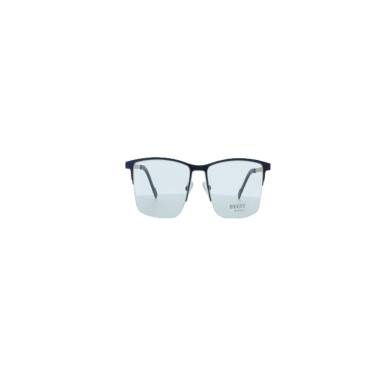

In [ ]:
segmentation_mask = masks[0]
binary_mask = np.where(segmentation_mask > 0.5, 1, 0)

white_background = np.ones_like(image) * 255

new_image = white_background * (1 - binary_mask[..., np.newaxis]) + image * binary_mask[..., np.newaxis]

plt.imshow(new_image.astype(np.uint8))
plt.axis('off')
plt.show()